In [35]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import scipy.stats as stats
import sklearn.metrics as skm
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [36]:
data=pd.read_csv('sample_data/heart_disease_uci.csv',sep=',' )
print(data.shape)

# replace ? with nan then dropna will remove records/rows with NaN or ? previously
data=data.replace('?',np.nan).dropna()
data=data.dropna()



(920, 16)


In [37]:
data=data.reset_index(drop=True)

In [38]:
# # manual
data.loc[np.where(data['sex']=="Male")[0],'sex']=0
data.loc[np.where(data['sex']=="Female")[0],'sex']=1

print(data)


      id  age sex        dataset               cp  trestbps   chol    fbs  \
0      1   63   0      Cleveland   typical angina     145.0  233.0   True   
1      2   67   0      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67   0      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37   0      Cleveland      non-anginal     130.0  250.0  False   
4      5   41   1      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...  ..            ...              ...       ...    ...    ...   
294  300   68   0      Cleveland     asymptomatic     144.0  193.0   True   
295  301   57   0      Cleveland     asymptomatic     130.0  131.0  False   
296  302   57   1      Cleveland  atypical angina     130.0  236.0  False   
297  509   47   0        Hungary     asymptomatic     150.0  226.0  False   
298  749   56   0  VA Long Beach     asymptomatic     120.0  100.0  False   

            restecg  thalch  exang  oldpeak        slope   ca  \
0    lv hy

In [39]:
# print(labels)

In [40]:
from sklearn.preprocessing import LabelEncoder 
arr=['dataset','cp','fbs','restecg','exang','slope','thal']
for i,el in enumerate(arr):
    label_encoder=LabelEncoder()
    newSeries = pd.Series(label_encoder.fit_transform(data[el]))
    data.loc[:,el]= newSeries


In [41]:
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,0,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,0,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,3,67,0,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,0,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,1,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,300,68,0,0,0,144.0,193.0,1,1,141.0,0,3.4,1,2.0,2,2
295,301,57,0,0,0,130.0,131.0,0,1,115.0,1,1.2,1,1.0,2,3
296,302,57,1,0,1,130.0,236.0,0,0,174.0,0,0.0,1,1.0,1,1
297,509,47,0,1,0,150.0,226.0,0,1,98.0,1,1.5,1,0.0,2,1


In [42]:
# using LabelEncoder manually

# label_encoder=LabelEncoder()
# newData=label_encoder.fit_transform(data['dataset'])


# data.loc[:,'dataset']=pd.Series(label_encoder.fit_transform(data['dataset']))
# data

In [43]:
# normalization

/home/mario/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mario/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mario/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mario/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

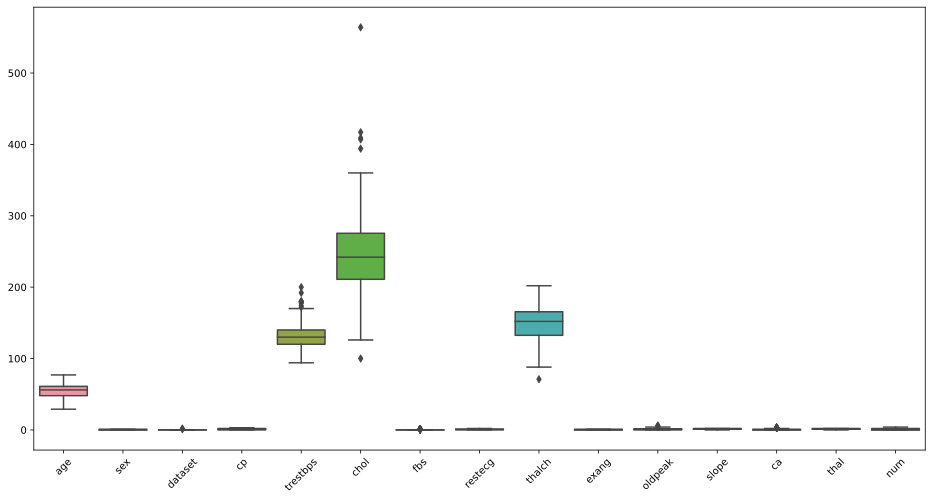

In [44]:
data=data[data.keys().drop('id')]
fig,ax=plt.subplots(1,figsize=(16,8))
ax=sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

In [45]:
data.describe()


,age,trestbps,chol,thalch,oldpeak,ca,num
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,131.715719,246.785953,149.327759,1.058528,0.672241,0.946488
std,9.030264,17.747751,52.532582,23.121062,1.162769,0.937438,1.230409
min,29.000000,94.000000,100.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,132.500000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,242.000000,152.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,275.500000,165.500000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


In [46]:
# normalization
col2ZScore=data.keys().drop('num')

for i,el in enumerate(col2ZScore):
    data[el] = stats.zscore(pd.to_numeric(data[el]))


/tmp/ipykernel_9331/486200873.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[el] = stats.zscore(pd.to_numeric(data[el]))


In [47]:
data

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,0.940446,-0.687682,-0.077824,1.987204,0.749760,-0.262867,2.439977,-0.999250,0.029124,-0.703562,1.069475,-2.264299,-0.718306,-2.276554,0
1,1.384143,-0.687682,-0.077824,-0.920662,1.596354,0.747722,-0.409840,-0.999250,-1.790447,1.421338,0.380309,-0.640737,2.487269,-0.566279,2
2,1.384143,-0.687682,-0.077824,-0.920662,-0.661231,-0.339138,-0.409840,-0.999250,-0.880662,1.421338,1.327912,-0.640737,1.418744,1.143997,1
3,-1.943588,-0.687682,-0.077824,1.017915,-0.096835,0.061285,-0.409840,0.903781,1.632079,-0.703562,2.103224,-2.264299,-0.718306,-0.566279,0
4,-1.499891,1.454161,-0.077824,0.048627,-0.096835,-0.815830,-0.409840,-0.999250,0.982232,-0.703562,0.294163,0.982825,-0.718306,-0.566279,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.495068,-0.687682,-0.077824,-0.920662,0.693320,-1.025575,2.439977,0.903781,-0.360784,-0.703562,2.017078,-0.640737,1.418744,1.143997,2
295,0.274900,-0.687682,-0.077824,-0.920662,-0.096835,-2.207774,-0.409840,0.903781,-1.487186,1.421338,0.121872,-0.640737,0.350219,1.143997,3
296,0.274900,1.454161,-0.077824,0.048627,-0.096835,-0.205664,-0.409840,-0.999250,1.068878,-0.703562,-0.911877,-0.640737,0.350219,-0.566279,1
297,-0.834344,-0.687682,7.678605,-0.920662,1.031958,-0.396341,-0.409840,0.903781,-2.223678,1.421338,0.380309,-0.640737,-0.718306,1.143997,1


In [48]:
# making num from 0 to 1
data.loc[data['num']>0,'num']=1 


In [49]:
data.describe()


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,299.000000
mean,1.158494e-16,-1.782298e-17,-5.940993e-18,-7.129191e-17,-5.940993e-17,2.643742e-16,-5.940993e-18,5.940993e-17,1.307018e-16,6.089518e-17,-7.129191e-17,4.752794e-17,-3.564596e-17,-5.940993e-18,0.464883
std,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,0.499601
min,-2.830983e+00,-6.876819e-01,-7.782370e-02,-9.206621e-01,-2.128661e+00,-2.798873e+00,-4.098399e-01,-9.992503e-01,-3.393403e+00,-7.035624e-01,-9.118773e-01,-2.264299e+00,-7.183062e-01,-2.276554e+00,0.000000
25%,-7.234199e-01,-6.876819e-01,-7.782370e-02,-9.206621e-01,-6.612308e-01,-6.823565e-01,-4.098399e-01,-9.992503e-01,-7.290310e-01,-7.035624e-01,-9.118773e-01,-6.407368e-01,-7.183062e-01,-5.662785e-01,0.000000
50%,1.639752e-01,-6.876819e-01,-7.782370e-02,4.862652e-02,-9.683454e-02,-9.125720e-02,-4.098399e-01,9.037805e-01,1.157698e-01,-7.035624e-01,-2.227113e-01,-6.407368e-01,-7.183062e-01,-5.662785e-01,0.000000
75%,7.185971e-01,1.454161e+00,-7.782370e-02,1.017915e+00,4.675617e-01,5.475113e-01,-4.098399e-01,9.037805e-01,7.006319e-01,1.421338e+00,4.664548e-01,9.828252e-01,3.502190e-01,1.143997e+00,1.000000
max,2.493387e+00,1.454161e+00,1.543503e+01,1.987204e+00,3.853939e+00,6.048548e+00,2.439977e+00,2.806811e+00,2.281926e+00,1.421338e+00,4.429159e+00,9.828252e-01,2.487269e+00,1.143997e+00,1.000000


/home/mario/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mario/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mario/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mario/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

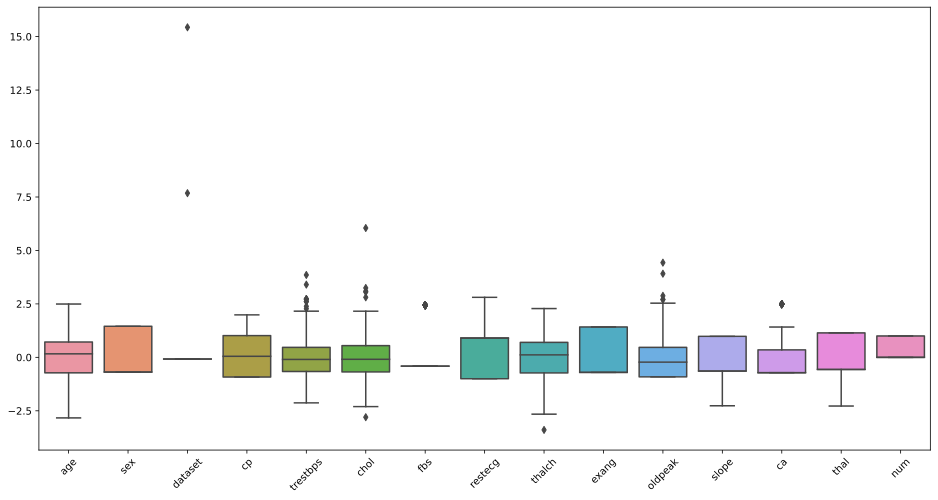

In [50]:
fig,ax=plt.subplots(1,figsize=(16,8))
ax=sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

In [52]:
data['num'].value_counts()

num
0    160
1    139
Name: count, dtype: int64